In [303]:
import pandas as pd
from datetime import datetime
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
csv_url = 'https://healthdata.gov/api/views/6xf2-c3ie/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(csv_url)
print(df.head())

  state  critical_staffing_shortage_today_yes  \
0    AS                                     0   
1    VI                                     0   
2    AK                                     1   
3    CA                                     6   
4    FL                                     7   

   critical_staffing_shortage_today_no  \
0                                    1   
1                                    2   
2                                   21   
3                                  117   
4                                  185   

   critical_staffing_shortage_today_not_reported  \
0                                              0   
1                                              0   
2                                              2   
3                                            284   
4                                             75   

   critical_staffing_shortage_anticipated_within_week_yes  \
0                                                  1        
1                

In [276]:
df_dailystate = pd.read_csv('https://healthdata.gov/api/views/g62h-syeh/rows.csv?accessType=DOWNLOAD')
for col in df_dailystate.columns:
    print(col)

In [278]:
df1 = pd.read_csv('https://healthdata.gov/resource/anag-cw7u.csv')
for col in df1.columns: 
    print(col)

hospital_pk
collection_week
state
ccn
hospital_name
address
city
zip
hospital_subtype
fips_code
is_metro_micro
total_beds_7_day_avg
all_adult_hospital_beds_7_day_avg
all_adult_hospital_inpatient_beds_7_day_avg
inpatient_beds_used_7_day_avg
all_adult_hospital_inpatient_bed_occupied_7_day_avg
inpatient_beds_used_covid_7_day_avg
total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg
total_adult_patients_hospitalized_confirmed_covid_7_day_avg
total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg
total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg
inpatient_beds_7_day_avg
total_icu_beds_7_day_avg
total_staffed_adult_icu_beds_7_day_avg
icu_beds_used_7_day_avg
staffed_adult_icu_bed_occupancy_7_day_avg
staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg
staffed_icu_adult_patients_confirmed_covid_7_day_avg
total_patients_hospitalized_confirmed_influenza_7_day_avg
icu_patients_confirmed_influenza_7_day_avg
total_patients_hospi

In [281]:
df1['fips_code'].nunique()  

### Why is there only 595 different counties ? 

595

# Adult ICU and Inpatient Bed Average Utilization by COVID Patients - COVID-19 Reported Patient Impact and Hospital Capacity by State Dataset & Average Number of Critical Staffing Shortage Reports by State


In [282]:
df_dailystate = pd.read_csv('https://healthdata.gov/api/views/g62h-syeh/rows.csv?accessType=DOWNLOAD')
for col in df_dailystate.columns: 
    print(col)

state
date
critical_staffing_shortage_today_yes
critical_staffing_shortage_today_no
critical_staffing_shortage_today_not_reported
critical_staffing_shortage_anticipated_within_week_yes
critical_staffing_shortage_anticipated_within_week_no
critical_staffing_shortage_anticipated_within_week_not_reported
hospital_onset_covid
hospital_onset_covid_coverage
inpatient_beds
inpatient_beds_coverage
inpatient_beds_used
inpatient_beds_used_coverage
inpatient_beds_used_covid
inpatient_beds_used_covid_coverage
previous_day_admission_adult_covid_confirmed
previous_day_admission_adult_covid_confirmed_coverage
previous_day_admission_adult_covid_suspected
previous_day_admission_adult_covid_suspected_coverage
previous_day_admission_pediatric_covid_confirmed
previous_day_admission_pediatric_covid_confirmed_coverage
previous_day_admission_pediatric_covid_suspected
previous_day_admission_pediatric_covid_suspected_coverage
staffed_adult_icu_bed_occupancy
staffed_adult_icu_bed_occupancy_coverage
staffed_icu_

In [283]:
df_dailystate

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,WY,2020/10/16,5,24,2,6,21,4,1.0,29,...,NaN,0,NaN,0,0.0,29,1.0,29,0.0,29
1,VI,2020/10/14,1,1,0,2,0,0,0.0,2,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,VI,2020/10/13,1,1,0,2,0,0,0.0,2,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
3,AL,2020/10/10,33,79,2,35,77,2,13.0,112,...,NaN,0,NaN,0,0.0,8,0.0,8,0.0,8
4,VT,2020/10/09,2,14,1,1,15,1,0.0,16,...,NaN,0,NaN,0,0.0,1,19.0,1,33.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44178,NV,2021/01/19,0,1,59,0,1,59,38.0,58,...,NaN,0,NaN,0,NaN,0,0.0,1,0.0,1
44179,AZ,2021/06/03,23,97,3,27,93,3,3.0,120,...,NaN,0,NaN,0,NaN,0,136.0,103,222.0,103
44180,NV,2021/01/31,0,4,59,0,4,59,28.0,61,...,NaN,0,NaN,0,NaN,0,0.0,4,0.0,4
44181,DC,2021/02/01,0,12,2,0,12,2,6.0,12,...,NaN,0,NaN,0,NaN,0,8.0,3,12.0,3


In [284]:
df1

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_unknown_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_avg,staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_avg,staffed_pediatric_icu_bed_occupancy_7_day_coverage,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_avg,total_staffed_pediatric_icu_beds_7_day_coverage,total_staffed_pediatric_icu_beds_7_day_sum
0,360098,2020-08-07T00:00:00.000,OH,360098,LAKE HEALTH,7590 AUBURN ROAD,CONCORD,44077,Short Term,39085.0,...,NaN,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
1,360247,2022-05-20T00:00:00.000,OH,360247,"WOODS AT PARKSIDE,THE",349 OLDE RIDENOUR ROAD,COLUMBUS,43230,Short Term,39049.0,...,0.0,0.0,4,0.0,0.0,4,0.0,0.0,4,0.0
2,501305,2022-05-20T00:00:00.000,WA,501305,LINCOLN HOSPITAL,10 NICHOLS STREET,DAVENPORT,99122,Critical Access Hospitals,53043.0,...,NaN,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
3,061300,2022-05-06T00:00:00.000,CO,061300,WEISBROD MEMORIAL COUNTY HOSPITAL,1208 LUTHER ST,EADS,81036,Critical Access Hospitals,8061.0,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
4,281331,2020-11-06T00:00:00.000,NE,281331,AVERA CREIGHTON HOSPITAL,"P O BOX 186, 1503 MAIN ST",CREIGHTON,68729,Critical Access Hospitals,31107.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,050625,2022-05-13T00:00:00.000,CA,050625,CEDARS-SINAI MEDICAL CENTER,8700 BEVERLY BLVD,LOS ANGELES,90048,Short Term,6037.0,...,0.0,-999999.0,7,-999999.0,6.3,7,44.0,12.0,7,84.0
996,141306,2022-05-13T00:00:00.000,IL,141306,COMMUNITY HOSPITAL OF STAUNTON,400 N CALDWELL ST,STAUNTON,62088,Critical Access Hospitals,17117.0,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
997,050100,2022-05-06T00:00:00.000,CA,050100,SHARP MEMORIAL HOSPITAL,7901 FROST ST,SAN DIEGO,92123,Short Term,6073.0,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
998,360077,2022-05-13T00:00:00.000,OH,360077,FAIRVIEW HOSPITAL,18101 LORAIN AVENUE,CLEVELAND,44111,Short Term,39035.0,...,0.0,0.0,7,0.0,30.1,7,211.0,36.9,7,258.0


# Times series with number of cases 


In [294]:
path = "/Users/augustinkuntz/Downloads/county_daily.csv"
df = pd.read_csv(path)
for col in df.columns: 
    print(col)
df

Unnamed: 0
date
fips
county
state
cases
cases_avg
deaths
deaths_avg


,Unnamed: 0,date,fips,county,state,cases,cases_avg,deaths,deaths_avg
0,0,2020-01-21,53061,Snohomish,Washington,1,0.14,0,0.0
1,1,2020-01-22,53061,Snohomish,Washington,0,0.14,0,0.0
2,2,2020-01-23,53061,Snohomish,Washington,0,0.14,0,0.0
3,3,2020-01-24,53061,Snohomish,Washington,0,0.14,0,0.0
4,4,2020-01-24,17031,Cook,Illinois,1,0.14,0,0.0
...,...,...,...,...,...,...,...,...,...
2603925,2639588,2022-05-21,69110,Saipan,Northern Mariana Islands,0,0.00,0,0.0
2603926,2639589,2022-05-21,69100,Rota,Northern Mariana Islands,0,0.00,0,0.0
2603927,2639590,2022-05-21,78030,St. Thomas,Virgin Islands,0,43.86,0,0.0
2603928,2639591,2022-05-21,78020,St. John,Virgin Islands,0,4.00,0,0.0


In [332]:
df2 = df.groupby("fips").agg(list) # dataframe with fips as index and each columns contain list
print(df2.head(5))

                                             Unnamed: 0  \
fips                                                      
1001  [10834, 12369, 14032, 15816, 17704, 19681, 217...   
1003  [2307, 2735, 3211, 3757, 4397, 5163, 6079, 711...   
1005  [30817, 33233, 35684, 38183, 40741, 43328, 459...   
1007  [21758, 23919, 26146, 28450, 30816, 33232, 356...   
1009  [12367, 14030, 15814, 17702, 19679, 21757, 239...   

                                                   date  \
fips                                                      
1001  [2020-03-24, 2020-03-25, 2020-03-26, 2020-03-2...   
1003  [2020-03-14, 2020-03-15, 2020-03-16, 2020-03-1...   
1005  [2020-04-03, 2020-04-04, 2020-04-05, 2020-04-0...   
1007  [2020-03-30, 2020-03-31, 2020-04-01, 2020-04-0...   
1009  [2020-03-25, 2020-03-26, 2020-03-27, 2020-03-2...   

                                                 county  \
fips                                                      
1001  [Autauga, Autauga, Autauga, Autauga, Autauga, ..

In [304]:
i = 1001  ###  code fips 
s = df2['date'] 
x = s[i] ### list of dates for the i-th county
cases_i = df2['cases']
y =  cases_i[i]

#index = pd.date_range(start="1996", end="2008", freq="A")
#data = pd.Series(data, index)


789

In [305]:
index = pd.date_range(start=min(x), end=max(x)) #start and end for the specific county
len(index)
data = pd.Series(y[-len(index):], index) 
index, data

(DatetimeIndex(['2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
                '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31',
                '2020-04-01', '2020-04-02',
                ...
                '2022-05-12', '2022-05-13', '2022-05-14', '2022-05-15',
                '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19',
                '2022-05-20', '2022-05-21'],
               dtype='datetime64[ns]', length=789, freq='D'),
 2020-03-24     1
 2020-03-25     3
 2020-03-26     1
 2020-03-27     0
 2020-03-28     2
               ..
 2022-05-17     1
 2022-05-18     2
 2022-05-19    12
 2022-05-20     6
 2022-05-21     0
 Freq: D, Length: 789, dtype: int64)

Daily cases of COVID19 in fips 1001 from April 2020


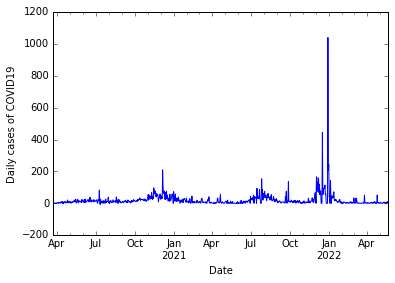

In [306]:
ax = data.plot() 
ax.set_xlabel("Date")
ax.set_ylabel("Daily cases of COVID19")
print("Daily cases of COVID19 in fips 1001 from April 2020")

# Single Exponential Smoothing

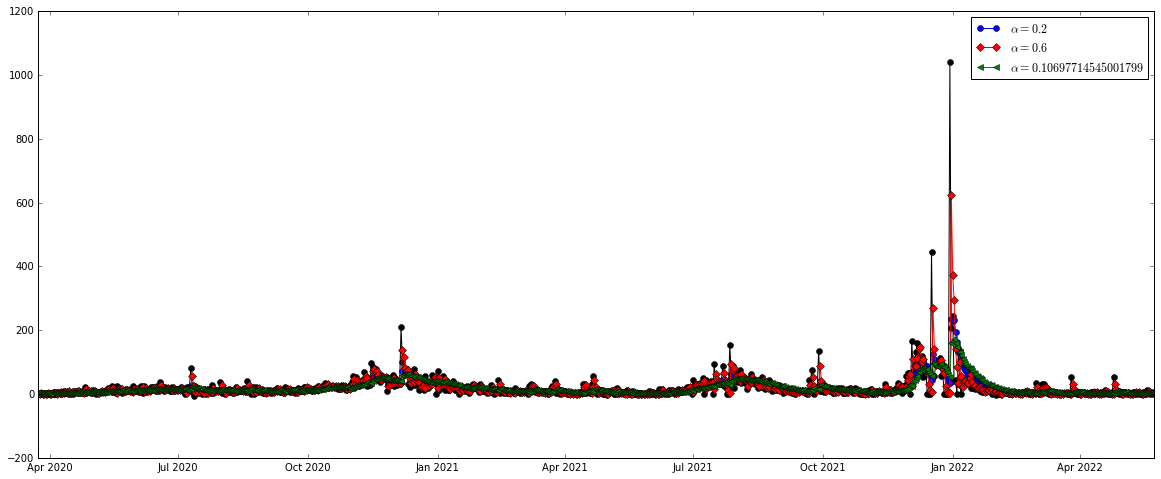

In [322]:
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

fit1 = SimpleExpSmoothing(data, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
fit2 = SimpleExpSmoothing(data, initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(data, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(20, 8))
plt.plot(data, marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="D", color="red")
(line2,) = plt.plot(fcast2, marker="D", color="red")
plt.plot(fit3.fittedvalues, marker="<", color="green")
(line3,) = plt.plot(fcast3, marker="<", color="green")

plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [315]:
print(sum((fit1.fittedvalues-data)*(fit1.fittedvalues-data))/len(index), sum((fit2.fittedvalues-data)*(fit2.fittedvalues-data))/len(index), sum((fit3.fittedvalues-data)*(fit3.fittedvalues-data))/len(index))
#model 3 : automatically find an optimized α value for us

1967.5019745780728 2395.816045890103 1921.47857476773


# Holt’s Method

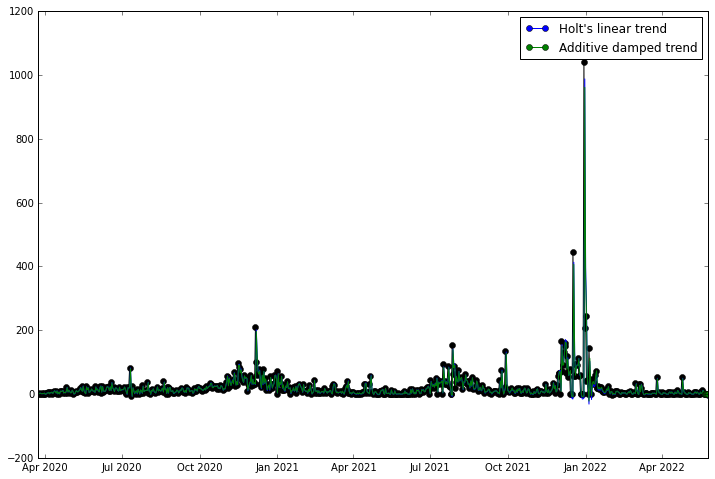

In [321]:
fit4 = Holt(data, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast4 = fit4.forecast(5).rename("Holt's linear trend")

fit5 = Holt(data, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2
)
fcast5 = fit5.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(data, marker="o", color="black")
plt.plot(fit4.fittedvalues, color="blue")
(line4,) = plt.plot(fcast4, marker="o", color="blue")

plt.plot(fit5.fittedvalues, color="green")
(line5,) = plt.plot(fcast5, marker="o", color="green")
plt.legend([line4, line5], [fcast4.name, fcast5.name])


In [325]:
print(sum((fit4.fittedvalues-data)*(fit4.fittedvalues-data))/len(index), sum((fit5.fittedvalues-data)*(fit5.fittedvalues-data))/len(index)) 

3231.737905339264 3098.613184448875


# Seasonally adjusted data

In [368]:
fit1 = SimpleExpSmoothing(data, initialization_method="estimated").fit()
fit2 = Holt(data, initialization_method="estimated").fit()
fit4 = Holt(data, damped_trend=True, initialization_method="estimated").fit(
    damping_trend=0.97
)
fit1_name = "Simple Exponential Smoothing"
fit2_name = "Holt model"
fit4_name = "Damped version of the Holt’s additive model"

params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "initial_level",
    "initial_trend",
]
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$l_0$", "$b_0$", "SSE", "MSE" ],
    columns=["SES", "Holt's", "Additive"],
)
results["SES"] = [fit1.params[p] for p in params] + [fit1.sse] + [sum((fit1.fittedvalues-data)*(fit1.fittedvalues-data))/len(index)]
results["Holt's"] = [fit2.params[p] for p in params] + [fit2.sse] + [sum((fit2.fittedvalues-data)*(fit2.fittedvalues-data))/len(index)]
results["Additive"] = [fit4.params[p] for p in params] + [fit4.sse] + [sum((fit4.fittedvalues-data)*(fit4.fittedvalues-data))/len(index)]
results

,SES,Holt's,Additive
$\alpha$,1.069771e-01,1.121926e-01,1.068599e-01
$\beta$,NaN,1.159901e-04,0.000000e+00
$\phi$,NaN,NaN,9.700000e-01
$l_0$,2.474945e+00,1.420253e+00,-6.727025e-01
$b_0$,NaN,9.354849e-04,4.269014e-01
SSE,1.516047e+06,1.516420e+06,1.515888e+06
MSE,1.921479e+03,1.921952e+03,1.921278e+03


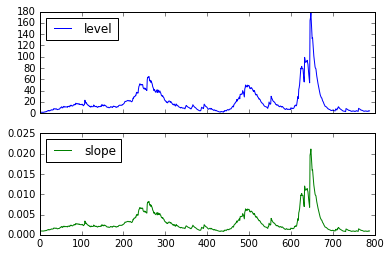

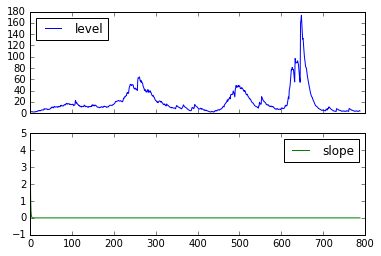

Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method.


In [333]:
for fit in [fit2, fit4]:
    pd.DataFrame(np.c_[fit.level, fit.trend]).rename(
        columns={0: "level", 1: "slope"}
    ).plot(subplots=True)
plt.show()
print(
    "Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method."
)

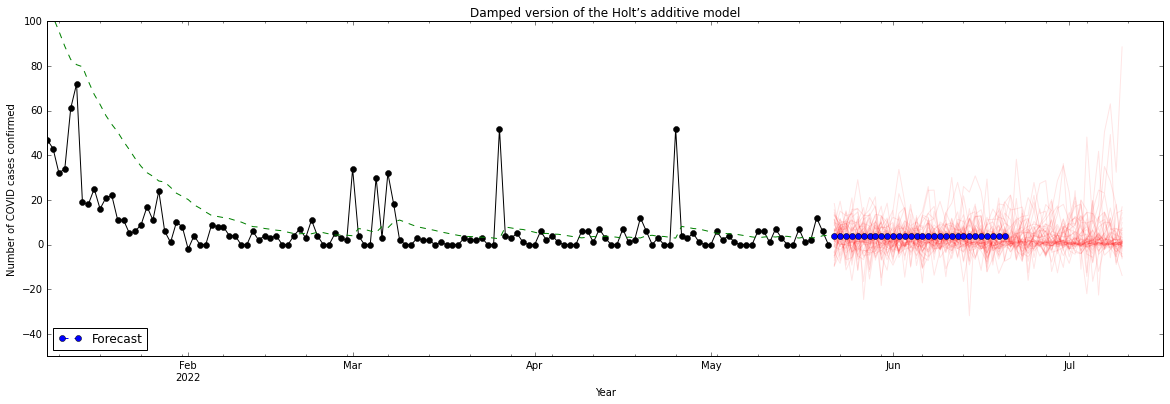

In [410]:
fit = Holt(data, damped_trend=True, initialization_method="estimated").fit(
    damping_trend=0.97)
simulations = fit.simulate(50, repetitions=50, error="mul")

ax = aust.plot(
    figsize=(20, 6),
    marker="o",
    color="black",
    title=fit4_name,
)
ax.set_ylabel("Number of COVID cases confirmed")
ax.set_xlabel("Year")
fit.fittedvalues.plot(ax=ax, style="--", color="green")
simulations.plot(ax=ax, style="-", alpha=0.1, color="red", legend=False)
fit.forecast(30).rename("Forecast").plot(
    ax=ax, style="--", marker="o", color="blue", legend=True
)
plt.axis([19000, 19190, -50, 100])
plt.show()
